In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

file_path = "customer_data.csv"  
customer_data = pd.read_csv(file_path)

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [3]:
print(customer_data.head())



   CustomerID  Gender  Age  ProductID  PurchaseAmount
0           1  Female   28        101            42.5
1           2    Male   35        102            63.0
2           3  Female   45        103            17.8
3           4    Male   32        104            25.2
4           5  Female   22        105           157.5


In [4]:
print(f"Total rows: {customer_data.shape[0]}")
print(f"Total columns: {customer_data.shape[1]}")


Total rows: 10
Total columns: 5


In [5]:
unique_customers = customer_data["CustomerID"].nunique()
unique_products = customer_data["ProductID"].nunique()

print(f"Unique Customers: {unique_customers}")
print(f"Unique Products: {unique_products}")


Unique Customers: 10
Unique Products: 10


In [6]:
female_customers = customer_data[customer_data["Gender"] == "Female"]
print(female_customers)


   CustomerID  Gender  Age  ProductID  PurchaseAmount
0           1  Female   28        101           42.50
2           3  Female   45        103           17.80
4           5  Female   22        105          157.50
6           7  Female   33        107           26.25
8           9  Female   29        109            8.90


In [7]:
average_age_male = customer_data[customer_data["Gender"] == "Male"]["Age"].mean()
average_age_female = customer_data[customer_data["Gender"] == "Female"]["Age"].mean()

print(f"Average age of male customers: {average_age_male:.2f}")
print(f"Average age of female customers: {average_age_female:.2f}")


Average age of male customers: 39.00
Average age of female customers: 31.40


In [8]:
total_purchase_amount = customer_data["PurchaseAmount"].sum()
print(f"Total Purchase Amount: {total_purchase_amount:.2f}")


Total Purchase Amount: 552.90


In [9]:
most_purchased_product = customer_data["ProductID"].value_counts().idxmax()
print(f"The most purchased product is: {most_purchased_product}")


The most purchased product is: 101


In [10]:
# Define age bins and labels
age_bins = [18, 25, 35, 45, 55]
age_labels = ["18-25", "26-35", "36-45", "46-55"]

# Add a new column for age groups
customer_data["AgeGroup"] = pd.cut(customer_data["Age"], bins=age_bins, labels=age_labels, right=False)

# Calculate the average purchase amount for each age group
age_group_analysis = customer_data.groupby("AgeGroup")["PurchaseAmount"].mean()
print(age_group_analysis)


AgeGroup
18-25    157.500000
26-35     25.712500
36-45     79.666667
46-55     26.775000
Name: PurchaseAmount, dtype: float64


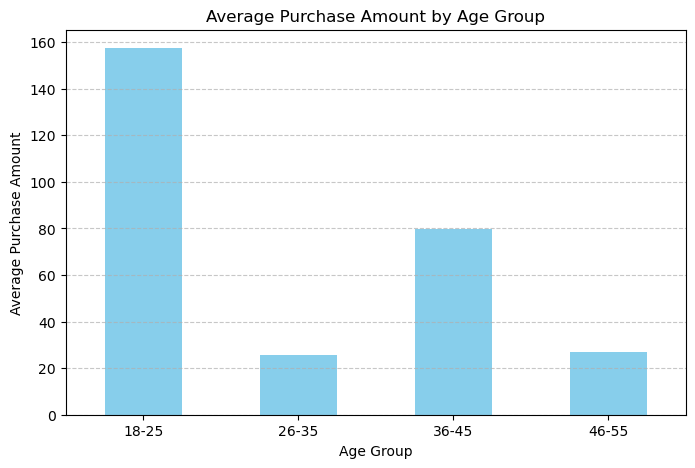

In [11]:
import matplotlib.pyplot as plt

# Plot the bar chart
age_group_analysis.plot(kind="bar", color="skyblue", figsize=(8, 5))

plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
